29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
844/844 - 12s - 15ms/step - accuracy: 0.7880 - loss: 0.5831 - val_accuracy: 0.8637 - val_loss: 0.3722
Epoch 2/10
844/844 - 13s - 16ms/step - accuracy: 0.8654 - loss: 0.3742 - val_accuracy: 0.8793 - val_loss: 0.3100
Epoch 3/10
844/844 - 5s - 6ms/step - accuracy: 0.8864 - loss: 0.3161 - val_accuracy: 0.8937 - val_loss: 0.2862
Epoch 4/10
844/844 - 4s - 4ms/step - accuracy: 0.8966 - loss: 0.2833 - val_accuracy: 0.8998 - val_loss: 0.2717
Epoch 5/10
844/844 - 3s - 3ms/step - accuracy: 0.9069 - loss: 0.2558 - val_accuracy: 0.9072 - val_loss: 0.2547
Epoch 6/10
844/844 - 3s - 3ms/step - accuracy: 0.9146 - loss: 0.2348 - val_accuracy: 0.9093 - val_loss: 0.2587
Epoch 7/10
844/844 - 3s - 3ms/step - accuracy: 0.9214 - loss: 0.2169 - val_accuracy: 0.9028 - val_loss: 0.2576
Epoch 8/10
844/844 - 6s - 7ms/step - accuracy: 0.9267 - loss: 0.1982 - val_accuracy: 0.9132 - val_loss: 0.2471
Epoch 9/10
844/844 - 5s - 6ms/step - accuracy: 0.9331 - loss: 0.1831 - val_accuracy: 0.9180 - val_loss: 0.24

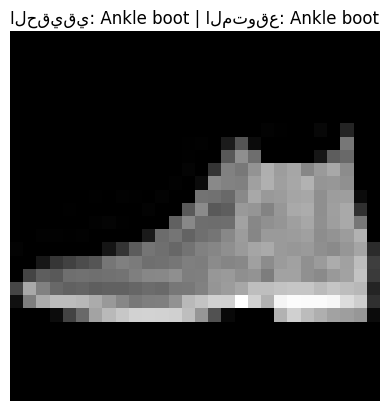

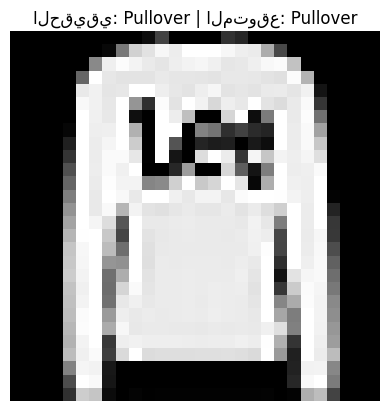

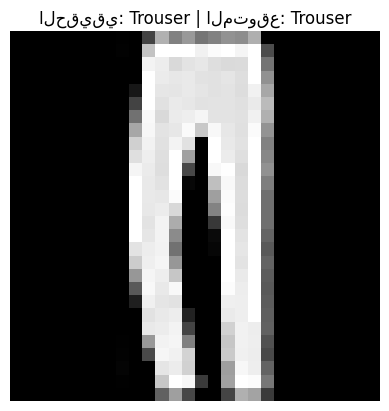

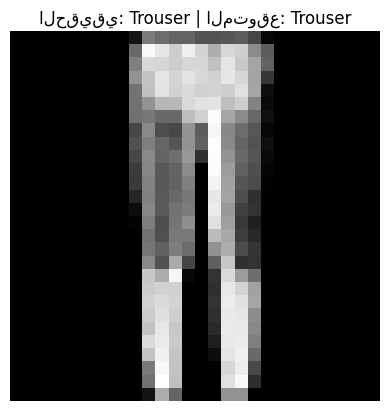

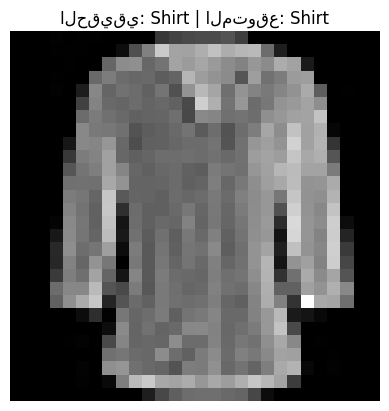

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# 1. تحميل بيانات Fashion-MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# أسماء الأصناف
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# 2. تهيئة البيانات (تحويل الصور إلى 4D: (28,28,1) لأن الصور رمادية)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)  # إضافة البعد الخاص بالقناة
x_test = np.expand_dims(x_test, -1)

# 3. بناء نموذج CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)), # طبقة تلافيفية 32 فلتر
    layers.MaxPooling2D((2,2)),                                        # طبقة تجميع
    layers.Conv2D(64, (3,3), activation="relu"),                       # طبقة تلافيفية ثانية
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation="relu"),                      # طبقة أعمق
    layers.Flatten(),                                                  # فرد المصفوفة إلى متجه
    layers.Dense(128, activation="relu"),                              # طبقة مخفية
    layers.Dropout(0.4),                                               # تقليل overfitting
    layers.Dense(10, activation="softmax")                             # طبقة إخراج (10 أصناف)
])

# 4. تجميع النموذج
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 5. التدريب
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_split=0.1, verbose=2)

# 6. التقييم
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ دقة النموذج على بيانات الاختبار: {test_acc:.4f}")

# 7. التنبؤ على بعض العينات
predictions = model.predict(x_test[:5])

for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title(f"الحقيقي: {class_names[y_test[i]]} | المتوقع: {class_names[np.argmax(predictions[i])]}")
    plt.axis("off")
    plt.show()